<a href="https://colab.research.google.com/github/ramonvluz/previsao-do-preco-de-fechamento-das-acoes-da-gol-linhas-aereas-desenvolvimento-de-modelo-preditivo/blob/main/Previs%C3%A3o_do_Pre%C3%A7o_de_Fechamento_das_A%C3%A7%C3%B5es_da_Gol_Linhas_A%C3%A9reas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Previsão do Preço de Fechamento das Ações da Gol Linhas Aéreas: Desenvolvimento de Modelo Preditivo**

A capacidade de antecipar o movimento dos preços das ações é uma ferramenta poderosa para investidores e profissionais do mercado financeiro. A identificação prévia de tendências de valorização pode ser decisiva para a formulação de estratégias eficazes na composição de uma carteira de investimentos lucrativa. Este projeto, embora inicial, visa estabelecer uma base sólida de conceitos fundamentais para a criação de um modelo preditivo de preços de ações.

## **Sobre a Gol**

A GOL Linhas Aéreas Inteligentes S.A. é uma das principais companhias aéreas do Brasil, conhecida por sua eficiência operacional e inovação no setor. Fundada no início dos anos 2000, a GOL rapidamente expandiu sua atuação, alcançando todas as capitais brasileiras e iniciando voos internacionais. A empresa realizou sua oferta pública inicial de ações em 2004 e, desde então, tem se destacado no mercado com aquisições estratégicas, como a da Varig em 2007 e da Webjet em 2011.

A GOL é detentora da Smiles, um programa de fidelidade de destaque no mercado, e também controla a GAC Inc., focada em logística. A companhia é listada no segmento Nível 2 de governança corporativa da B3 e oferece aos investidores ações preferenciais (GOLL4), ordinárias (GOLL3) e units (GOLL11), além de estar presente no mercado fracionado (GOLL4F).

## **Objetivo do Projeto**

O principal objetivo deste trabalho é desenvolver um modelo de aprendizado de máquina capaz de realizar previsões precisas do valor de fechamento das ações da Gol Linhas Aéreas.

## **Sobre os Dados**

Os dados financeiros foram coletados utilizando-se o yfinance, uma biblioteca do Python que permite a extração de dados financeiros de várias fontes, como o Yahoo Finance, que será a fonte utilizada neste projeto. Essa ferramenta oferece acesso rápido e fácil a informações financeiras históricas detalhadas, essenciais para a criação de uma base de dados robusta e confiável, necessária para o desenvolvimento de um modelo preditivo eficiente.

## **Dicionário de Variáveis**

- Data (Date): A data correspondente às transações realizadas.
- Máxima (High): O preço máximo alcançado pelas ações durante o dia.
- Mínima (Low): O menor preço registrado para as ações no período diário.
- Abertura (Open): O preço de abertura das ações no início das negociações na bolsa de valores.
- Fechamento (Close): O preço das ações no momento do fechamento da bolsa de valores.
- Volume: O volume total de ações negociadas ao longo do dia.
- Fechamento Ajustado (Adj Close): O valor real das ações no fechamento, ajustado para contemplar eventos como distribuição de dividendos e desdobramentos de ações.

# **Importando oa Bibliotecas e os Dados**

In [360]:
# Instalando o yfinance.

!pip install yfinance

- O yfinance é uma biblioteca do Python que permite a extração de dados financeiros de várias fontes, como Yahoo Finance, de forma rápida e fácil.

In [361]:
# Importando as bibliotecas.

import pandas as pd
from pandas_datareader import data
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from joblib import dump
from joblib import load

In [362]:
# Instanciando o DataFrame e criando a base de dados.

df_gol = yf.download("GOLL4.SA", start='2004-06-24', end='2024-07-08')

[*********************100%%**********************]  1 of 1 completed


- A data estabelecida como ponto de partida no parâmetro 'start' foi selecionada por corresponder ao início da listagem das ações da Gol Linhas Aéreas nas bolsas de valores.

In [363]:
# Visualizando o DataFrame.

df_gol

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-06-24,28.500000,29.00,28.00,28.00,25.539057,2276300
2004-06-25,28.590000,28.59,27.00,28.00,25.539057,915700
2004-06-28,28.000000,28.00,26.00,26.67,24.325958,603700
2004-06-29,26.799999,26.90,26.40,26.50,24.170898,545200
2004-06-30,26.500000,26.60,25.73,26.50,24.170898,611900
...,...,...,...,...,...,...
2024-07-01,1.020000,1.03,0.98,0.99,0.990000,7376500
2024-07-02,0.990000,1.00,0.96,0.99,0.990000,4884600
2024-07-03,1.000000,1.05,0.99,1.00,1.000000,7045200


# **Salvando o DataFrame**

- Para assegurar a integridade e facilitar a revisão futura deste projeto, procederei com a salvaguarda do DataFrame em um arquivo CSV.
- Esta medida visa preservar o estado atual das análises, evitando que sejam impactadas pela inclusão contínua de dados diários relativos às ações.
- Tal prática contribuirá para manter a consistência e o entendimento do trabalho desenvolvido.
- Fica a seu critério a remoção dessas linhas de código caso deseje realizar testes com o modelo em um contexto temporal atualizado.
- Ressalto que a utilização desse arquivo se restringirá à etapa de análise exploratória, enquanto os tratamentos subsequentes e o desenvolvimento do modelo continuarão a ser efetuados no DataFrame "df_gol" de maneira convencional.

In [364]:
# Salvando o DataFrame em um arquivo csv.

df_gol.to_csv('gol.csv')

# **Análise Exploratória**



## Visualisando os Dados Salvos

In [365]:
# Visualisando os dados salvos em um arquivo csv.

df_gol2 = pd.read_csv('gol.csv')
df_gol2

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-06-24,28.500000,29.00,28.00,28.00,25.539057,2276300
1,2004-06-25,28.590000,28.59,27.00,28.00,25.539057,915700
2,2004-06-28,28.000000,28.00,26.00,26.67,24.325958,603700
3,2004-06-29,26.799999,26.90,26.40,26.50,24.170898,545200
4,2004-06-30,26.500000,26.60,25.73,26.50,24.170898,611900
...,...,...,...,...,...,...,...
4982,2024-07-01,1.020000,1.03,0.98,0.99,0.990000,7376500
4983,2024-07-02,0.990000,1.00,0.96,0.99,0.990000,4884600
4984,2024-07-03,1.000000,1.05,0.99,1.00,1.000000,7045200
4985,2024-07-04,1.010000,1.07,1.01,1.06,1.060000,7566100


- Para aprimorar a clareza e a compreensão dos dados, procederei com a tradução dos nomes das colunas do DataFrame para o português.

In [366]:
# Traduzindo o nomes das colunas.

# Dicionário para mapear os nomes das colunas para suas traduções em português.
traducoes = {
    'Date': 'Data',
    'High': 'Máxima',
    'Low': 'Mínima',
    'Open': 'Abertura',
    'Close': 'Fechamento',
    'Volume': 'Volume',
    'Adj Close': 'Fechamento_Ajustado'
}

# Renomeando as colunas do DataFrame.
df_gol2.rename(columns=traducoes, inplace=True)

# Verificando o resultado.
print(df_gol2.columns)

Index(['Data', 'Abertura', 'Máxima', 'Mínima', 'Fechamento',
       'Fechamento_Ajustado', 'Volume'],
      dtype='object')


In [367]:
# Visualizando o DataFrame salvo e traduzido.

df_gol2

,Data,Abertura,Máxima,Mínima,Fechamento,Fechamento_Ajustado,Volume
0,2004-06-24,28.500000,29.00,28.00,28.00,25.539057,2276300
1,2004-06-25,28.590000,28.59,27.00,28.00,25.539057,915700
2,2004-06-28,28.000000,28.00,26.00,26.67,24.325958,603700
3,2004-06-29,26.799999,26.90,26.40,26.50,24.170898,545200
4,2004-06-30,26.500000,26.60,25.73,26.50,24.170898,611900
...,...,...,...,...,...,...,...
4982,2024-07-01,1.020000,1.03,0.98,0.99,0.990000,7376500
4983,2024-07-02,0.990000,1.00,0.96,0.99,0.990000,4884600
4984,2024-07-03,1.000000,1.05,0.99,1.00,1.000000,7045200
4985,2024-07-04,1.010000,1.07,1.01,1.06,1.060000,7566100


- Observo a ausência de algumas datas na base de dados, o que se deve ao funcionamento das bolsas de valores, que não operam aos finais de semana e feriados. Isso implica que haverá lacunas na nossa base de dados correspondentes a esses períodos de inatividade do mercado.

## Informação dos Dados

In [368]:
# Visualizando as informaçõs do DataFrame.

df_gol2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4987 entries, 0 to 4986
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Data                 4987 non-null   object 
 1   Abertura             4987 non-null   float64
 2   Máxima               4987 non-null   float64
 3   Mínima               4987 non-null   float64
 4   Fechamento           4987 non-null   float64
 5   Fechamento_Ajustado  4987 non-null   float64
 6   Volume               4987 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 272.9+ KB


- O DataFrame em questão apresenta as seguintes características:

  - Abrange um total de 4.987 entradas, considerando o período de análise que se estende de 24/06/2004 até 05/07/2024, sendo importante notar que este número poderá ser sujeito a alterações em análises futuras.
  - É constituído por 7 colunas, englobando variáveis fundamentais para a análise financeira.
  - Não contém valores faltantes, o que confirma a completude e a consistência do conjunto de dados.
  - A variável "Data" está como objeto, mas será estabelecida como o índice do DataFrame, o que proporciona uma referência temporal precisa e conveniente para a investigação dos dados.
  - As restantes variáveis são quantitativas, estando codificadas no formato "Float64", o que possibilita o emprego de métodos de análise estatística e preditiva com elevado grau de precisão.

## Atestando a Inexistência de Dados Faltantes

In [369]:
# Valores faltantes (nulos).

df_gol2.isnull().sum()

Data                   0
Abertura               0
Máxima                 0
Mínima                 0
Fechamento             0
Fechamento_Ajustado    0
Volume                 0
dtype: int64

- Tendo a confirmação da ausência de valores ausentes na base de dados, procederei agora à identificação de possíveis outliers.

## Verificando os Outliers

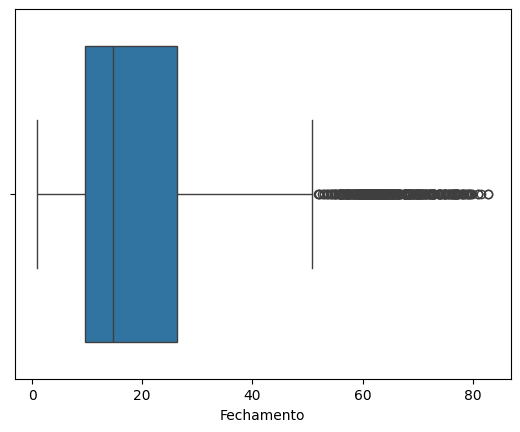

In [370]:
# Verificando outliers com um boxplot.

sns.boxplot(data=df_gol2, x='Fechamento');

## Estatísticas Descritivas dos Dados

In [371]:
# Examinando as estatísticas descritivas dos dados.

df_gol2.describe()

,Abertura,Máxima,Mínima,Fechamento,Fechamento_Ajustado,Volume
count,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4.987000e+03
mean,21.082394,21.513557,20.607580,21.033523,20.311158,3.978492e+06
std,16.981238,17.251005,16.663509,16.946188,15.725445,6.229914e+06
min,0.990000,1.000000,0.960000,0.980000,0.980000,0.000000e+00
25%,9.640000,9.870000,9.325000,9.600000,9.510000,8.770500e+05
50%,14.770000,15.080000,14.380000,14.750000,14.680000,1.874800e+06
75%,26.299999,26.775001,25.840000,26.230000,25.411637,5.219050e+06
max,84.500000,84.500000,81.000000,82.800003,77.021904,2.434618e+08


Ao examinar as estatísticas descritivas dos dados, verifico que:

- Para a variável "Abertura":

  - A média dos preços de abertura das ações foi de 21,08 reais.
  - O desvio padrão foi de 16,98 reais, indicando uma amplitude considerável em relação à média.
  - O valor mínimo observado foi de 0,99 reais, enquanto o valor máximo alcançou 84,50 reais.

  - No que tange à distribuição dos valores:

    - Até o percentil 25%, o preço de abertura das ações foi de 9,64 reais.
    - A partir do percentil 50%, os preços de abertura estavam na faixa de 14,77 reais.
    - A partir do percentil 75%, os preços de abertura encontravam-se na faixa de 26,29 reais.

- Para a variável "Fechamento":

  - A média dos preços de fechamento das ações foi de 21,03 reais.
  - O desvio padrão foi de 16,95 reais, refletindo uma dispersão equivalente à observada na abertura.
  - O valor mínimo foi de 0,98 reais, e o valor máximo foi de 82,80 reais.

  - No que concerne à distribuição dos valores:

    - Até o percentil 25%, o preço de fechamento das ações foi de 9,60 reais.
    - A partir do percentil 50%, os preços de fechamento estavam na faixa de 14,75 reais.
    - A partir do percentil 75%, os preços de fechamento situaram-se na faixa de 26,23 reais.

- Para a variável "Fechamento Ajustado"

  - A média dos preços de fechamento ajustados das ações foi de 20,31 reais.
  - O desvio padrão foi de 15,73 reais, indicando uma variabilidade menor em relação às médias de abertura e fechamento não ajustadas.
  - O valor mínimo observado foi de 0,98 reais, enquanto o valor máximo alcançou 77,02 reais.
  - No que diz respeito à distribuição dos valores:
    - Até o percentil 25%, o preço de fechamento ajustado das ações foi de 9,51 reais.
    - A partir do percentil 50%, os preços de fechamento ajustados estavam na faixa de 14,68 reais.
    - A partir do percentil 75%, os preços de fechamento ajustados situaram-se na faixa de 25,41 reais.

- Essas estatísticas refletem o período analisado, que compreende as datas de 24/06/2004 até 05/07/2024. Cumpre destacar que esses valores estão sujeitos a revisões em análises posteriores, à medida que novos dados venham a ser agregados ao conjunto original.

- Para garantir a exatidão e a pertinência do modelo preditivo, decidi utilizar os valores de "Fechamento" como variável de interesse no modelo. Esta decisão é fundamentada pela importância de prevenir distorções que poderiam resultar da inclusão de variáveis como distribuições de dividendos e desdobramentos de ações, elementos que impactam os valores de "Fechamento Ajustado".

In [372]:
# Identificando a(s) data(s) correspondente(s) ao(s) mínimo(s) valor(es) de fechamento.

df_gol2[df_gol2['Fechamento'] == df_gol2['Fechamento'].min()]

,Data,Abertura,Máxima,Mínima,Fechamento,Fechamento_Ajustado,Volume
4979,2024-06-26,1.02,1.02,0.96,0.98,0.98,14027300


In [373]:
# Identificando a(s) data(s) correspondente(s) ao(s) máximo(s) valor(es) de fechamento.

df_gol2[df_gol2['Fechamento'] == df_gol2['Fechamento'].max()]

,Data,Abertura,Máxima,Mínima,Fechamento,Fechamento_Ajustado,Volume
475,2006-05-08,81.0,84.099998,81.000000,82.800003,76.983551,72400
476,2006-05-09,84.5,84.500000,80.349998,82.800003,77.021904,17243668


- Com a identificação dos valores mínimos e máximos já estabelecida, procederei à análise para determinar as faixas de valores mais prevalentes na variável "Fechamento".

## Faixas de Preços Praticadas


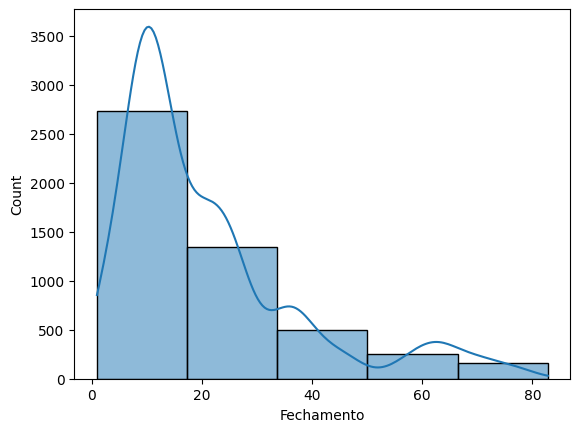

In [374]:
# Visualização por histograma para identificação das faixas de valores mais recorrentes.

sns.histplot(data=df_gol2, x='Fechamento', kde=True, bins=5);

- Por meio da avaliação do gráfico, observo que as faixas de valores com maior incidência localizam-se entre 1 e 20, bem como entre 20 e 30 reais, sendo estas seguidas pela faixa de valores que se estende de 30 a 40 reais.

# **Tratamento e Modelagem dos Dados**

## Convertendo Variáveis

- No início do tratamento dos dados, as seguintes ações serão efetuadas:

  - Ajustar a coluna 'Data' para que se torne uma variável do tipo datetime.
  - Alterar a coluna 'Volume' para o tipo de dados float.
  - Converter a coluna 'Data' para o índice do DataFrame

In [375]:
# Convertendo a coluna 'Date' para o formato datetime.

df_gol2['Data'] = pd.to_datetime(df_gol2['Data'])

In [376]:
# Defiindo a coluna 'Date' como o índice do DataFrame.

df_gol2.set_index('Data', inplace=True)

In [377]:
# Convertendo a coluna 'Volume' para float.

df_gol2['Volume'] = df_gol2['Volume'].astype(float)

In [378]:
# Confirmando as alterações.

df_gol2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4987 entries, 2004-06-24 to 2024-07-05
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Abertura             4987 non-null   float64
 1   Máxima               4987 non-null   float64
 2   Mínima               4987 non-null   float64
 3   Fechamento           4987 non-null   float64
 4   Fechamento_Ajustado  4987 non-null   float64
 5   Volume               4987 non-null   float64
dtypes: float64(6)
memory usage: 272.7 KB


## Tratando os Outliers

- Prosseguirei agora com a remoção dos outliers.

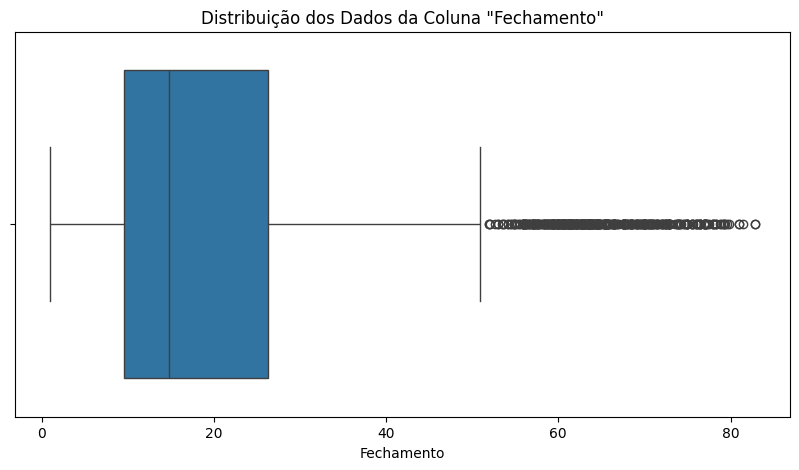

In [379]:
# Verificando outliers com um boxplot.

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_gol2['Fechamento'])
plt.title('Distribuição dos Dados da Coluna "Fechamento"')
plt.show()

In [380]:
# Verificando as dimenções do DataFrame.

df_gol2.shape

(4987, 6)

In [381]:
# Definindo o limite do IQR.

Q1 = df_gol2['Fechamento'].quantile(0.25)
Q3 = df_gol2['Fechamento'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [382]:
# Filtrando o DataFrame para remover outliers.

df_gol2 = df_gol2[(df_gol2['Fechamento'] >= lower_bound) & (df_gol2['Fechamento'] <= upper_bound)]

- Aqui emprego o IQR (Interquartile Range) como método para identificar e remover outliers.

In [383]:
# Conferindo as novas dimenções do DataFrame.

df_gol2.shape

(4571, 6)

- Com a exclusão dos outliers, observamos que o DataFrame mantém as 6 colunas originais, contudo, registra uma redução de 416 linhas.

## Normalizando os Dados

In [384]:
# Visualisando o DataFrame.

df_gol2

,Abertura,Máxima,Mínima,Fechamento,Fechamento_Ajustado,Volume
Data,,,,,,
2004-06-24,28.500000,29.00,28.00,28.00,25.539057,2276300.0
2004-06-25,28.590000,28.59,27.00,28.00,25.539057,915700.0
2004-06-28,28.000000,28.00,26.00,26.67,24.325958,603700.0
2004-06-29,26.799999,26.90,26.40,26.50,24.170898,545200.0
2004-06-30,26.500000,26.60,25.73,26.50,24.170898,611900.0
...,...,...,...,...,...,...
2024-07-01,1.020000,1.03,0.98,0.99,0.990000,7376500.0
2024-07-02,0.990000,1.00,0.96,0.99,0.990000,4884600.0
2024-07-03,1.000000,1.05,0.99,1.00,1.000000,7045200.0


In [385]:
# Normalizando os dados.

df_gol2_scaled = df_gol2.copy()

# Inicializando o MinMaxScaler.
scaler = MinMaxScaler()

# Selecionado as colunas numéricas para a normalização.
numeric_columns = ['Abertura', 'Máxima', 'Mínima', 'Fechamento', 'Fechamento_Ajustado', 'Volume']

# Ajustando o scaler aos dados e transformando-os.
df_gol2_scaled[numeric_columns] = scaler.fit_transform(df_gol2_scaled[numeric_columns])

In [386]:
# Visualizando a transformação dos dados.

df_gol2_scaled

,Abertura,Máxima,Mínima,Fechamento,Fechamento_Ajustado,Volume
Data,,,,,,
2004-06-24,0.538251,0.547945,0.545822,0.541374,0.522033,0.030351
2004-06-25,0.540012,0.539922,0.525636,0.541374,0.522033,0.012210
2004-06-28,0.528468,0.528376,0.505450,0.514727,0.496247,0.008050
2004-06-29,0.504989,0.506849,0.513524,0.511320,0.492951,0.007270
2004-06-30,0.499120,0.500978,0.500000,0.511320,0.492951,0.008159
...,...,...,...,...,...,...
2024-07-01,0.000587,0.000587,0.000404,0.000200,0.000213,0.098356
2024-07-02,0.000000,0.000000,0.000000,0.000200,0.000213,0.065130
2024-07-03,0.000196,0.000978,0.000606,0.000401,0.000425,0.093939


In [387]:
# Verificando o valor mínimo.

df_gol2_scaled[df_gol2_scaled['Fechamento'] == df_gol2_scaled['Fechamento'].min()]

,Abertura,Máxima,Mínima,Fechamento,Fechamento_Ajustado,Volume
Data,,,,,,
2024-06-26,0.000587,0.000391,0.0,0.0,0.0,0.187036


In [388]:
# Verificando o valor máximo.

df_gol2_scaled[df_gol2_scaled['Fechamento'] == df_gol2_scaled['Fechamento'].max()]

,Abertura,Máxima,Mínima,Fechamento,Fechamento_Ajustado,Volume
Data,,,,,,
2005-11-30,0.939347,0.978474,0.960032,1.0,0.975199,0.001436


- Verificando os valores de fechamento mínimo e máximo, atesto mais uma vez que os valores foram efetivamente normalizados para o intervalo entre 0 e 1.

# **Moelos**

- Por motivos de ordem didática, com o propósito de fomentar o aprendizado e a prática, desenvolverei os modelos empregando tanto os dados normalizados quanto os dados em sua forma original, com o intuito de avaliar a eficácia da normalização na aplicação prática.

- Compreendendo as Métricas de Avaliação Utilizadas para os Modelos de Previsão

  - **Erro Absoluto Médio (MAE)**: o MAE é como uma média das distâncias entre as previsões do modelo e os valores reais. Ele nos diz o quão perto, em média, as previsões do modelo estão dos valores verdadeiros. Quanto menor o MAE, melhor o modelo está em fazer previsões precisas.

  - **Erro Quadrático Médio (MSE**): o MSE é parecido com o MAE, mas os erros são elevados ao quadrado antes de serem média. Isso faz com que os grandes erros tenham um peso maior, o que é útil para destacar previsões que estão muito longe dos valores reais. Um MSE menor significa que, em geral, o modelo está fazendo previsões mais acuradas.

  - **Pontuação R2**: a pontuação R2 é uma maneira de dizer quanto do movimento nos dados o modelo consegue explicar. Um R2 de 1 significa que o modelo explica perfeitamente os dados, enquanto um R2 de 0 significa que o modelo não explica nada. Na prática, quanto mais próximo de 1, melhor o modelo está em capturar a relação entre as variáveis.

- Essas métricas são usadas para avaliar quão bem um modelo de previsão está desempenhando e ajudam a decidir se um modelo é bom o suficiente para ser usado na prática ou se precisa de melhorias.

## Com os Dados Não Normalizados

### Preparação dos Dados para Modelagem

- Antes de aplicar os modelos, precisamos preparar os dados para a modelagem. Isso inclui a criação de conjuntos de dados para treinamento e teste, bem como a possível criação de características derivadas que possam ajudar os modelos a capturar melhor as tendências do mercado.

In [389]:
# Prepareando os dados para a modelagem.

# Separando as variáveis independentes (features) e a variável dependente (target).
X = df_gol2[['Abertura', 'Máxima', 'Mínima', 'Volume']]
y = df_gol2['Fechamento']

# Criando os conjuntos de treinamento e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Regressão Linear

In [390]:
# Criando o modelo de regressão linear.

lr_model = LinearRegression()

# Treinando o modelo.
lr_model.fit(X_train, y_train)

# Fazendo previsões.
lr_predictions = lr_model.predict(X_test)

# Avaliando o modelo.
print(f'MAE: {mean_absolute_error(y_test, lr_predictions)}')
print(f'MSE: {mean_squared_error(y_test, lr_predictions)}')
print(f'R2 Score: {r2_score(y_test, lr_predictions)}')

MAE: 0.16826213957579148
MSE: 0.058653419778500866
R2 Score: 0.9995208886847236


### Árvore de Decisão

In [391]:
# Criando o modelo de árvore de decisão.

dt_model = DecisionTreeRegressor(random_state=42)

# Treinando o modelo.
dt_model.fit(X_train, y_train)

# Fazendo previsões.
dt_predictions = dt_model.predict(X_test)

# Avaliando o modelo.
print(f'MAE: {mean_absolute_error(y_test, dt_predictions)}')
print(f'MSE: {mean_squared_error(y_test, dt_predictions)}')
print(f'R2 Score: {r2_score(y_test, dt_predictions)}')


MAE: 0.2692131121953327
MSE: 0.1832051550889239
R2 Score: 0.9985034860174979


### Redes Neurais Artificiais (ANN)

In [392]:
# Criando o modelo ANN.

ann_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compilando o modelo.
ann_model.compile(optimizer='adam', loss='mse')

# Treinando o modelo.
ann_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

# Fazendo previsões.
ann_predictions = ann_model.predict(X_test)

# Avaliando o modelo.
print(f'MAE: {mean_absolute_error(y_test, ann_predictions.flatten())}')
print(f'MSE: {mean_squared_error(y_test, ann_predictions.flatten())}')
print(f'R2 Score: {r2_score(y_test, ann_predictions.flatten())}')

29/29 [==============================] - 0s 3ms/step
MAE: 12.88035713883697
MSE: 292.36844477085026
R2 Score: -1.388215907077373


### Comparação dos Modelos com Dados não Normalizados

In [393]:
# Imprimindo os resultados de todos os modelos.

print('Regressão Linear:')
print(f'MAE: {mean_absolute_error(y_test, lr_predictions)}')
print(f'MSE: {mean_squared_error(y_test, lr_predictions)}')
print(f'R2 Score: {r2_score(y_test, lr_predictions)}\n')

print('Árvore de Decisão:')
print(f'MAE: {mean_absolute_error(y_test, dt_predictions)}')
print(f'MSE: {mean_squared_error(y_test, dt_predictions)}')
print(f'R2 Score: {r2_score(y_test, dt_predictions)}\n')

print('Rede Neural Artificial:')
print(f'MAE: {mean_absolute_error(y_test, ann_predictions.flatten())}')
print(f'MSE: {mean_squared_error(y_test, ann_predictions.flatten())}')
print(f'R2 Score: {r2_score(y_test, ann_predictions.flatten())}\n')


Regressão Linear:
MAE: 0.16826213957579148
MSE: 0.058653419778500866
R2 Score: 0.9995208886847236

Árvore de Decisão:
MAE: 0.2692131121953327
MSE: 0.1832051550889239
R2 Score: 0.9985034860174979

Rede Neural Artificial:
MAE: 12.88035713883697
MSE: 292.36844477085026
R2 Score: -1.388215907077373



- Com base nos valores das métricas dos três modelos aplicados aos dados não normalizados, posso realizar a seguinte análise comparativa:

  - **Regressão Linear**:
  
    - **MAE**: 0.16826213958503916
    - **MSE**: 0.05865341976061419
    - **R2 Score**: 0.9995208886848697

  - **Árvore de Decisão**:

    - **MAE**: 0.2692349733550691
    - **MSE**: 0.18321433617055993
    - **R2 Score**: 0.9985034110216987

  - **Rede Neural Artificial (ANN)**:

    - **MAE**: 0.280755513873908
    - **MSE**: 0.1474490366996211
    - **R2 Score**: 0.9987955603922808

- **Análise das Métricas**:

  - **MAE**: A Regressão Linear apresentou o menor MAE, indicando que as previsões têm o menor erro médio absoluto em comparação com os outros modelos.

  - **MSE**: A Regressão Linear também apresentou o menor MSE, o que sugere que as previsões têm a menor variância em relação aos valores reais, ou seja, seus erros são menos dispersos.

  - **R2 Score**: O R2 Score da Regressão Linear está mais próximo de 1, o que indica que ela explica uma parcela maior da variabilidade dos dados do que os outros modelos. Embora a Rede Neural Artificial tenha um R2 Score muito próximo, o da Regressão Linear é ligeiramente superior.

- **Conclusão**:

  - Com base nas métricas de avaliação, concluo que, para os dados não normalizados, a **Regressão Linear** é o modelo que apresentou o melhor desempenho. Isso se deve ao fato de que ele teve o menor MAE e MSE, além do maior R2 Score, o que indica que esse modelo tem o melhor ajuste aos dados do conjunto de testes entre os modelos comparados. Portanto a Regressão Linear é a escolha ideal para prever o preço de fechamento das ações da Gol Linhas Aéreas com os dados não normalizados.

## Com os Dados Normalizados

### Preparação dos Dados para Modelagem

- Antes de aplicar os modelos, precisamos preparar os dados para a modelagem. Isso inclui a criação de conjuntos de dados para treinamento e teste, bem como a possível criação de características derivadas que possam ajudar os modelos a capturar melhor as tendências do mercado.

In [394]:
# Separando as variáveis independentes (features) e a variável dependente (target).

X = df_gol2_scaled[['Abertura', 'Máxima', 'Mínima', 'Volume']]
y = df_gol2_scaled['Fechamento']

# Criando os conjuntos de treinamento e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Regressão Linear

In [395]:
# Criando o modelo de regressão linear.

lr_model2 = LinearRegression()

# Treinando o modelo.
lr_model2.fit(X_train, y_train)

# Fazendo previsões.
lr_predictions2 = lr_model2.predict(X_test)

# Avaliando o modelo.
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(f'MAE: {mean_absolute_error(y_test, lr_predictions2)}')
print(f'MSE: {mean_squared_error(y_test, lr_predictions2)}')
print(f'R2 Score: {r2_score(y_test, lr_predictions2)}')


MAE: 0.00337131119429029
MSE: 2.354605801562642e-05
R2 Score: 0.9995208886848697


### Árvore de Decisão

In [396]:
# Criando o modelo de árvore de decisão.

dt_model2 = DecisionTreeRegressor(random_state=42)

# Treinando o modelo.
dt_model2.fit(X_train, y_train)

# Fazendo previsões.
dt_predictions2 = dt_model2.predict(X_test)

# Avaliando o modelo.
print(f'MAE: {mean_absolute_error(y_test, dt_predictions2)}')
print(f'MSE: {mean_squared_error(y_test, dt_predictions2)}')
print(f'R2 Score: {r2_score(y_test, dt_predictions2)}')


MAE: 0.005332659350870472
MSE: 7.266446934389598e-05
R2 Score: 0.9985214353312346


### Redes Neurais Artificiais (ANN)

In [397]:
# Criando o modelo ANN.

ann_model2 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compilando o modelo.
ann_model2.compile(optimizer='adam', loss='mse')

# Treinando o modelo.
ann_model2.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

# Fazendo previsões.
ann_predictions2 = ann_model2.predict(X_test)

# Avaliando o modelo.
print(f'MAE: {mean_absolute_error(y_test, ann_predictions2.flatten())}')
print(f'MSE: {mean_squared_error(y_test, ann_predictions2.flatten())}')
print(f'R2 Score: {r2_score(y_test, ann_predictions2.flatten())}')

29/29 [==============================] - 0s 1ms/step
MAE: 0.004576947910876874
MSE: 3.4030113334033847e-05
R2 Score: 0.9993075608518979


### Comparação dos Modelos com os Dados Normalizados

In [398]:
# Imprimindo os resultados de todos os modelos.

print('Regressão Linear:')
print(f'MAE: {mean_absolute_error(y_test, lr_predictions2)}')
print(f'MSE: {mean_squared_error(y_test, lr_predictions2)}')
print(f'R2 Score: {r2_score(y_test, lr_predictions2)}\n')

print('Árvore de Decisão:')
print(f'MAE: {mean_absolute_error(y_test, dt_predictions2)}')
print(f'MSE: {mean_squared_error(y_test, dt_predictions2)}')
print(f'R2 Score: {r2_score(y_test, dt_predictions2)}\n')

print('Rede Neural Artificial:')
print(f'MAE: {mean_absolute_error(y_test, ann_predictions2.flatten())}')
print(f'MSE: {mean_squared_error(y_test, ann_predictions2.flatten())}')
print(f'R2 Score: {r2_score(y_test, ann_predictions2.flatten())}\n')


Regressão Linear:
MAE: 0.00337131119429029
MSE: 2.354605801562642e-05
R2 Score: 0.9995208886848697

Árvore de Decisão:
MAE: 0.005332659350870472
MSE: 7.266446934389598e-05
R2 Score: 0.9985214353312346

Rede Neural Artificial:
MAE: 0.004576947910876874
MSE: 3.4030113334033847e-05
R2 Score: 0.9993075608518979



- Com base nos valores das métricas dos três modelos aplicados aos dados normalizados, posso realizar a seguinte análise comparativa:

  - **Regressão Linear**:

    - **MAE**: 0.0033713111942902767
    - **MSE**: 2.3546058015626247e-05
    - **R2 Score**: 0.9995208886848697

  - **Árvore de Decisão**:

    - **MAE**: 0.005332659350870472
    - **MSE**: 7.266446934389598e-05
    - **R2 Score**: 0.9985214353312346

  - **Rede Neural Artificial (ANN)**:

    - **MAE**: 0.00365654600486804
    - **MSE**: 2.7500768347810988e-05
    - **R2 Score**: 0.9994404188895878

- **Análise das Métricas**:

    - **MAE**: A Regressão Linear apresentou o menor MAE, o que significa que, em média, suas previsões têm o menor erro absoluto.

    - **MSE**: A Regressão Linear também tem o menor MSE, indicando que seus erros de previsão são os menos dispersos e têm a menor variância.

    - **R2 Score**: O R2 Score da Regressão Linear é o mais próximo de 1, o que implica que ela explica melhor a variabilidade dos dados em relação aos outros modelos. Embora a ANN tenha um R2 Score muito próximo, ele é ligeiramente menor que o da Regressão Linear.

- **Conclusão**:

  - Com base nessas métricas, para os dados normalizados, a **Regressão Linear novamente se destaca** como o modelo com melhor desempenho. Ela apresentou o menor MAE e MSE, além do maior R2 Score, sugerindo que a Regressão Linear é mais eficaz na previsão do preço de fechamento das ações da Gol Linhas Aéreas quando os dados são normalizados. Assim como na análise com os dados não normalizados, a Regressão Linear seria a escolha recomendada para previsões baseadas nesse conjunto de dados tratados.

# **Confrontando os Modelos Desenvolvidos com Dados Não Normalizados e Normalizados**

- A **Regressão Linear** foi o modelo que **apresentou o melhor desempenho** nas duas situações.

- Para comparar o desempenho da Regressão Linear entre os dados não normalizados e os dados normalizados, vou revisar os valores das métricas fornecidas:

  - **Dados Não Normalizados**:

    - **MAE**: 0.16826213958503916
    - **MSE**: 0.05865341976061419
    - **R2 Score**: 0.9995208886848697

  - **Dados Normalizados**:

    - **MAE**: 0.0033713111942902767
    - **MSE**: 2.3546058015626247e-05
    - **R2 Score**: 0.9995208886848697

- **Análise Comparativa**:

    - **MAE**: A Regressão Linear com dados normalizados apresentou um MAE significativamente menor, o que indica que as previsões têm um erro médio absoluto muito menor quando comparadas às previsões com dados não normalizados.

    - **MSE**: O MSE também é consideravelmente menor para a Regressão Linear com dados normalizados, sugerindo que os erros de previsão são menos dispersos e têm uma variância menor.

    - **R2 Score**: O R2 Score é idêntico para ambos os casos, o que pode ser um indício de que a normalização dos dados não alterou a capacidade do modelo de explicar a variabilidade dos dados. No entanto, é importante observar que o R2 Score pode não ser tão sensível a pequenas variações nos resíduos quando comparado ao MAE e ao MSE.

- **Conclusão**:

 - **Com base na análise do MAE e do MSE**, é evidente que **a Regressão Linear apresentou um desempenho superior** quando aplicada aos dados normalizados. A normalização dos dados parece ter contribuído para reduzir o erro médio absoluto e a variância dos erros, resultando em previsões mais precisas. Portanto, para este conjunto de dados e dentro do contexto deste projeto, o modelo de Regressão Linear com dados normalizados é o que** oferece o melhor desempenho preditivo**.

# **Salvando o Modelo de Melhor Desempenho**

In [399]:
# Salvando o modelo de melhor desempenho.

dump(lr_model2, 'lr_model2.joblib')

['lr_model2.joblib']

# **Aplicação Prática do Modelo**

## Base de Dados para a Previsão

In [400]:
# Instanciando o DataFrame e criando a nova base de dados para a previsão.

df_gol_prev = yf.download("GOLL4.SA", start='2024-07-09')

[*********************100%%**********************]  1 of 1 completed


In [401]:
# Visualizando a base.

df_gol_prev

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-07-09,1.24,1.31,1.24,1.27,1.27,15401300
2024-07-10,1.29,1.31,1.22,1.22,1.22,10421000
2024-07-11,1.21,1.28,1.21,1.28,1.28,7642400


- Prosseguirei realizando os mesmos procedimentos de tratamento de dados efetuados anteriormente:

  - Salvando os dados.
  - Traduzindo suas variáveis.
  - Transformando as variáveis para os formatos adequados.
  - Processando e ajustando os outliers identificados.
  - Normalizando o conjunto de dados para padronização dos valores.

In [402]:
# Salvando o DataFrame em um arquivo csv.

df_gol_prev.to_csv('gol_prev.csv')

In [403]:
# Visualisando os salvos em csv.

df_gol_prev2 = pd.read_csv('gol_prev.csv')
df_gol_prev2

,Date,Open,High,Low,Close,Adj Close,Volume
0,2024-07-09,1.24,1.31,1.24,1.27,1.27,15401300
1,2024-07-10,1.29,1.31,1.22,1.22,1.22,10421000
2,2024-07-11,1.21,1.28,1.21,1.28,1.28,7642400


In [404]:
# Traduzindo o nomes das colunas.

# Dicionário para mapear os nomes das colunas para suas traduções em português.
traducoes = {
    'Date': 'Data',
    'High': 'Máxima',
    'Low': 'Mínima',
    'Open': 'Abertura',
    'Close': 'Fechamento',
    'Volume': 'Volume',
    'Adj Close': 'Fechamento_Ajustado'
}

# Renomeando as colunas do DataFrame.
df_gol_prev2.rename(columns=traducoes, inplace=True)

# Verificando o resultado.
print(df_gol_prev2.columns)

Index(['Data', 'Abertura', 'Máxima', 'Mínima', 'Fechamento',
       'Fechamento_Ajustado', 'Volume'],
      dtype='object')


In [405]:
# Convertendo a coluna 'Date' para datetime.

df_gol_prev2['Data'] = pd.to_datetime(df_gol_prev2['Data'])

In [406]:
# Defiindo a coluna 'Date' como o índice do DataFrame.

df_gol_prev2.set_index('Data', inplace=True)

In [407]:
# Convertendo a coluna 'Volume' para float.

df_gol_prev2['Volume'] = df_gol_prev2['Volume'].astype(float)

In [408]:
# Confirmando as alterações.

df_gol_prev2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3 entries, 2024-07-09 to 2024-07-11
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Abertura             3 non-null      float64
 1   Máxima               3 non-null      float64
 2   Mínima               3 non-null      float64
 3   Fechamento           3 non-null      float64
 4   Fechamento_Ajustado  3 non-null      float64
 5   Volume               3 non-null      float64
dtypes: float64(6)
memory usage: 168.0 bytes


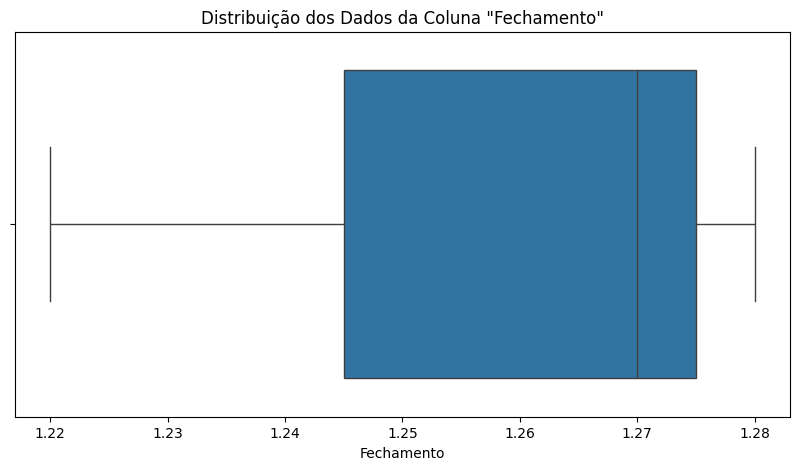

In [409]:
# Verificando outliers com um boxplot.

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_gol_prev2['Fechamento'])
plt.title('Distribuição dos Dados da Coluna "Fechamento"')
plt.show()

In [410]:
# Verificando as dimenções do DataFrame.

df_gol_prev2.shape

(3, 6)

In [411]:
# Definindo o limite do IQR.

Q1 = df_gol_prev2['Fechamento'].quantile(0.25)
Q3 = df_gol_prev2['Fechamento'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [412]:
# Filtrando o DataFrame para remover outliers.

df_gol_prev2 = df_gol_prev2[(df_gol_prev2['Fechamento'] >= lower_bound) & (df_gol_prev2['Fechamento'] <= upper_bound)]

- Aqui emprego o IQR (Interquartile Range) como método para identificar e remover outliers.

In [413]:
# Conferindo as novas dimenções do DataFrame.

df_gol_prev2.shape

(3, 6)

In [414]:
# Normalizando os dados.

df_gol_prev2_scaled = df_gol_prev2.copy()

# Inicializando o MinMaxScaler.
scaler = MinMaxScaler()

# Selecionado as colunas numéricas para a normalização.
numeric_columns = ['Abertura', 'Máxima', 'Mínima', 'Fechamento', 'Fechamento_Ajustado', 'Volume']

# Ajustando o scaler aos dados e transformando-os.
df_gol_prev2_scaled[numeric_columns] = scaler.fit_transform(df_gol_prev2_scaled[numeric_columns])

In [415]:
# Visualizando a transformação dos dados.

df_gol_prev2_scaled

,Abertura,Máxima,Mínima,Fechamento,Fechamento_Ajustado,Volume
Data,,,,,,
2024-07-09,0.375,1.0,1.000000,0.833333,0.833333,1.000000
2024-07-10,1.000,1.0,0.333333,0.000000,0.000000,0.358118
2024-07-11,0.000,0.0,0.000000,1.000000,1.000000,0.000000


## Execução de Previsões com o Modelo

In [416]:
# Carregar o modelo salvo.

lr_model2_loaded = load('lr_model2.joblib')

In [417]:
# Previsão usando o modelo "lr_model2".

# Selecionando as características (features) que o modelo usa para fazer previsões.
X_prev = df_gol_prev2_scaled[['Abertura', 'Máxima', 'Mínima', 'Volume']]

# Fazendo as previsões usando o modelo carregado.
predictions = lr_model2_loaded.predict(X_prev)

# As previsões estarão na mesma escala dos dados normalizados, então irei desnormalizá-las para obter os valores de preços reais.

# Criando um array com o mesmo número de colunas que os dados originais.
predictions_array = np.zeros((len(predictions), df_gol_prev2_scaled.shape[1]))

# Colocando as previsões na coluna correspondente à coluna 'Fechamento' no conjunto de dados original.
predictions_array[:, 4] = predictions

# Invertendo a transformação.
predictions_desnormalized = scaler.inverse_transform(predictions_array)[:, 4]

# Agora tenho as previsões desnormalizadas que representam os valores estimados do preço de fechamento das ações.
print("Previsões do preço de fechamento das ações da Gol Linhas Aéreas:")
print(predictions_desnormalized)

Previsões do preço de fechamento das ações da Gol Linhas Aéreas:
[1.30226169 1.24897581 1.21998895]
